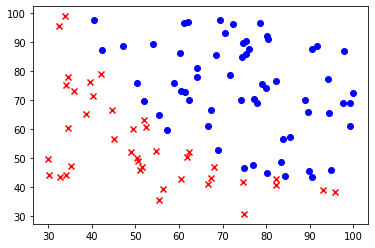

In [196]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#1)导入数据 绘制原始数据散点图
data=pd.read_csv('ex2data1.txt',names=['x1','x2','y'])
x1=data['x1']
x2=data['x2']
zeros=data['y'].values==0
ones=data['y'].values==1
#将y值为1的点用蓝色o表示,y值为0的点用红色x表示
plt.scatter(x1[zeros],x2[zeros],c='r',marker='x')
plt.scatter(x1[ones],x2[ones],c='b',marker='o')
plt.show()

In [197]:
#2)数据预处理

#标准化
std=StandardScaler()
x_train=data[['x1','x2']]
x_train=np.array(x_train)
x_train=std.fit_transform(x_train)
#插入一列全为1的数据
x_train=np.concatenate((np.ones((len(x_train),1)),x_train),axis=1)
cols=data.shape[1]
y_train=np.array(data.iloc[:,-1:cols])

In [200]:
#3)函数及模型训练

#模型函数
def LRmodel(x,theta):
    z=np.dot(x,theta)
    h=1.0/(1+np.exp(-z)) #sigmoid函数
    return h
#代价函数
def cost(h,y):
    m=len(h)
    j=np.multiply(-1.0/m,np.sum(np.multiply(y,np.log(h))+np.multiply((1-y),np.log(1-h))))
    return j
#梯度下降函数
def gradientDescent(x,y,alpha=0.1,iterTimes=20000):
    m,n=x.shape
    theta=np.zeros((n, 1)) #创建theta的矩阵,存储theta迭代的数据
    j=np.zeros(iterTimes)
    for i in range(iterTimes):
        h=LRmodel(x, theta)
        j[i]=cost(h, y)
        grad=np.dot(x.T,(h-y))/m
        theta=theta-alpha*grad
    return j,theta,grad

#训练模型
j,theta,grad=gradientDescent(x_train,y_train)
print("成本函数的梯度为:\n",grad)
print("theta值为:\n",theta)
print("最终的代价为:",j[-1])

成本函数的梯度为:
 [[-3.14493902e-08]
 [-6.71555535e-08]
 [-6.49842535e-08]]
theta值为:
 [[1.71844405]
 [3.992776  ]
 [3.72512527]]
最终的代价为: 0.2034977015902797


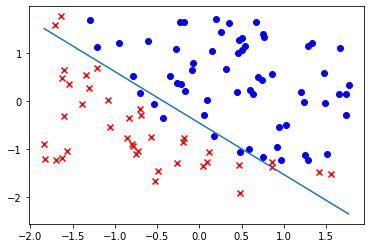

In [201]:
#4)画图
x1_test=x_train[:,1]
x2_test=x_train[:,2]
zeros_test=y_train[:,0]==0
ones_test=y_train[:,0]==1
plt.scatter(x1_test[zeros_test],x2_test[zeros_test],c='r',marker='x')
plt.scatter(x1_test[ones_test],x2_test[ones_test],c='b',marker='o')

# 计算x1的最大值和最小值对应的x2值,确定直线范围
min_x1 = x1_test.min()
max_x1 = x1_test.max()
minx2 = -((theta[0]+theta[1]*min_x1)/theta[2])
maxx2 = -((theta[0]+theta[1]*max_x1)/theta[2])
min_x2=minx2[0]
max_x2=maxx2[0]

#画出分割线
plt.plot([min_x1,max_x1],[min_x2,max_x2])
plt.show()